# **Importing Necccesary libraries and packages**

In [4]:
# This cell imports necessary libraries for data manipulation,
# visualization, text processing, and building a neural network model.

# Data handling and manipulation
import os # Provides a way to interact with the operating system, useful for file operations.
import numpy as np # Fundamental package for scientific computing with Python, especially for numerical operations.
import pandas as pd # Provides data structures and analysis tools, essential for working with tabular data.

# Data visualization
import matplotlib.pyplot as plt # A plotting library for creating static, interactive, and animated visualizations.
import seaborn as sns # A statistical data visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.

# Text processing and natural language processing (NLP)
import re # Provides regular expression operations for pattern matching in text.
import nltk # Natural Language Toolkit, a platform for working with human language data.
from nltk.corpus import stopwords # A corpus of words that are generally filtered out in NLP tasks.
nltk.download('stopwords') # Downloads the stopwords corpus.
import string # Provides a collection of string constants, useful for tasks like punctuation removal.

# Machine learning - model building and preparation
from sklearn.model_selection import train_test_split # Splits arrays or matrices into random train and test subsets.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # Tools to convert text data into numerical feature vectors.
from keras.models import Model # Used for building functional models in Keras.
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding # Layers for building neural networks, specifically an LSTM for sequential data.
from keras.optimizers import RMSprop # An optimizer for training neural networks.
from tensorflow.keras.preprocessing.text import Tokenizer # Tool to convert text into sequences of integers.
from tensorflow.keras.preprocessing.sequence import pad_sequences # Provides padding sequences for consistent input length.
from tensorflow.keras.utils import to_categorical # Utilities for handling categorical data
from keras.callbacks import EarlyStopping, ModelCheckpoint # Callbacks to monitor training and stop early or save the best model.
from sklearn.preprocessing import LabelBinarizer # Converts categorical labels into a one-hot encoding format.
from sklearn.metrics import confusion_matrix # Computes a confusion matrix to evaluate the accuracy of a classification.

# Potentially for building a sequential model, though 'Model' from keras.models is also imported
# from sklearn.models import Sequential # Note: This might be a typo, Sequential is typically from keras.models

# Pandas display options
pd.set_option('display.max_rows',None) # Displays all rows of a pandas DataFrame.
pd.set_option('display.max_columns',None) # Displays all columns of a pandas DataFrame.
pd.set_option('display.max_colwidth',255) # Sets the maximum width of a column when displaying.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
!pip install --upgrade gensim --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


# **Part A: Text Classification & Word Embeddings**

## **Importing dataset**

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [7]:
data_path = "/content/IMDB Dataset 2.csv"

In [8]:
path = '/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv'
df = pd.read_csv(path)

# Show the first 5 rows
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of v...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen-...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well b...",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br...",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situ...",positive


In [9]:
df.shape

(50000, 2)

In [10]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [11]:
df.isnull().sum()

,0
review,0
sentiment,0


In [12]:
df.duplicated().sum()

418

## **Text cleaning**

Removing html tags

In [15]:
import re
def remove_html(text):
  cleaned_text = re.sub(re.compile('<.*?>'),'', text)
  return cleaned_text

In [16]:
df['review'] = df['review'].apply(remove_html)

In [17]:
df.head(1)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, whi...",positive


Converting every word to lower case

In [18]:
df['review'] = df['review'].apply(lambda x: x.lower())

In [19]:
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [20]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)          # keep only letters
    text = text.lower()
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

df['input'] = df['review'].apply(clean_text)
df['output'] = df['sentiment'].map({'positive': 1, 'negative': 0})


## **Simple approach: TF-IDF + Logistic Regression**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df['input'], df['output'], test_size=0.2, random_state=42)

In [26]:
tfidf = TfidfVectorizer(max_features=5000)
#training matrix
tfidf_matrix_train = tfidf.fit_transform(X_train).toarray()
#test matrix
tfidf_matrix_test = tfidf.transform(X_test).toarray()

In [31]:
print(tfidf.vocabulary_)

{'kept': 2439, 'asking': 255, 'many': 2719, 'fights': 1688, 'screaming': 3859, 'matches': 2754, 'general': 1863, 'mayhem': 2767, 'minutes': 2852, 'also': 138, 'stand': 4178, 'think': 4474, 'one': 3108, 'dimensional': 1227, 'characters': 709, 'little': 2610, 'depth': 1168, 'virtually': 4779, 'impossible': 2228, 'care': 628, 'happens': 2017, 'badly': 321, 'written': 4978, 'director': 1238, 'hang': 2010, 'beliefs': 390, 'topic': 4542, 'done': 1293, 'much': 2927, 'better': 411, 'dramas': 1316, 'tv': 4634, 'cinema': 766, 'must': 2947, 'confess': 903, 'really': 3567, 'bad': 320, 'performances': 3228, 'film': 1695, 'said': 3805, 'heroine': 2075, 'best': 407, 'friend': 1819, 'nasty': 2964, 'brother': 539, 'absolutely': 9, 'terrible': 4443, 'know': 2473, 'acting': 38, 'school': 3846, 'full': 1831, 'post': 3352, 'lead': 2531, 'role': 3746, 'manages': 2711, 'impress': 2229, 'cast': 656, 'called': 595, 'british': 529, 'talent': 4385, 'probably': 3411, 'never': 3002, 'hear': 2049, 'least': 2540, 'h

In [32]:
print(tfidf.idf_)

[7.04278284 5.90968438 6.72146241 ... 5.50534985 5.75892929 6.32366017]


Applying classification algorithm

In [35]:
clf = LogisticRegression()
clf.fit(tfidf_matrix_train, y_train)

LogisticRegression()

In [36]:
y_pred = clf.predict(tfidf_matrix_test)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [42]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm

0.8911


array([[4346,  615],
       [ 474, 4565]])

*Required aim of 80% accuracy is achieved*

## **Word Embeddings(Word2Vec)**

In [43]:
!pip install --upgrade gensim --user

In [45]:
import gensim #this file have word2vec architechture
import os
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [48]:
from gensim.models import Word2Vec

In [49]:
tokenized_reviews = [review.split() for review in df['input']]

In [50]:
w2v_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=10, min_count=5, workers=4)

In [51]:
w2v_model.save("word2vec.model")

In [55]:
def get_review_vector(tokens, model, size):
    vec = np.zeros(size)
    count = 0
    for word in tokens:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    return vec / count if count else vec


In [56]:
X_vectors = np.array([get_review_vector(tokens, w2v_model, 100) for tokens in tokenized_reviews])
y = df['output'].values

In [57]:
from sklearn.manifold import TSNE

# Get top 100 words from your trained Word2Vec model
top_words = w2v_model.wv.index_to_key[:100]
top_vectors = np.array([w2v_model.wv[word] for word in top_words])

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=500)
reduced_vectors = tsne.fit_transform(top_vectors)


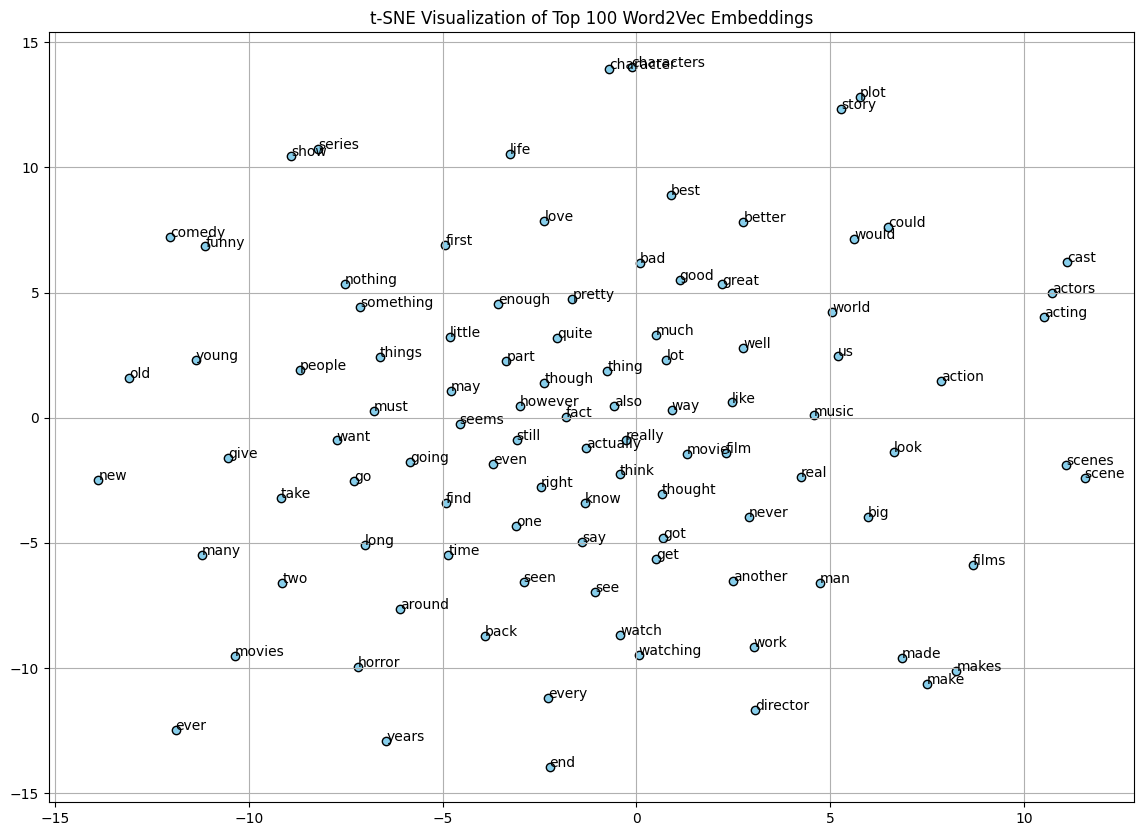

In [58]:
plt.figure(figsize=(14, 10))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], edgecolors='k', c='skyblue')
for i, word in enumerate(top_words):
    plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]))
plt.title("t-SNE Visualization of Top 100 Word2Vec Embeddings")
plt.grid(True)
plt.show()

# **Part B: Neural Networks**

## Training an ANN with Word2Vec Embeddings (done in previous Part A)



In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [60]:
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_vectors , df['output'], test_size=0.2) #X_vector cell link: https://colab.research.google.com/drive/1Uw55g4_-ep38kIw-yFZvf3XMfOoADQ63#scrollTo=7k0Pjm9GkWZS&line=1&uniqifier=1

model = Sequential([
    Dense(128, activation='relu', input_shape=(100,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_ann, y_train_ann, epochs=10, batch_size=32, validation_data=(X_test_ann, y_test_ann))


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8235 - loss: 0.3905 - val_accuracy: 0.8733 - val_loss: 0.3018
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8663 - loss: 0.3150 - val_accuracy: 0.8760 - val_loss: 0.2973
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8691 - loss: 0.3118 - val_accuracy: 0.8772 - val_loss: 0.2953
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8747 - loss: 0.3017 - val_accuracy: 0.8773 - val_loss: 0.2948
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8774 - loss: 0.2972 - val_accuracy: 0.8788 - val_loss: 0.2901
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8774 - loss: 0.2921 - val_accuracy: 0.8795 - val_loss: 0.2890
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8739 - loss: 0.2943 - val_accuracy: 0.8793 - val_loss: 0.2895
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8802 - loss: 

In [65]:
#report
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_pred_ann = model.predict(X_test_ann)
y_pred_ann = (y_pred_ann > 0.5).astype(int)
print("Accuracy",accuracy_score(y_test_ann, y_pred_ann))
print(classification_report(y_test_ann, y_pred_ann))
cm = confusion_matrix(y_test_ann, y_pred_ann)
print("Confusion Matrix")
cm

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Accuracy 0.8815
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      5068
           1       0.86      0.91      0.88      4932

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix


array([[4340,  728],
       [ 457, 4475]])

## CNN for Text classification

In [76]:
# importing the necessary libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Setting up the parameters
maximum_features = 5000  # Maximum number of words to consider as features
maximum_length = 100  # Maximum length of input sequences
embedding_dim = 100  # Dimension of word embeddings
no_of_filters = 250  # Number of filters in the convolutional layer
kernel_size = 3  # Size of the convolutional filters
hidden_dims = 250  # Number of neurons in the hidden layer
batch_size = 32  # Batch size for training
epochs = 10  # Number of training epochs
threshold = 0.5  # Threshold for binary classification

In [77]:
#tokenizing
tokenizer = Tokenizer(num_words=maximum_features)
tokenizer.fit_on_texts(df['input'])
sequences = tokenizer.texts_to_sequences(df['input'])
X_pad = pad_sequences(sequences, maxlen=maximum_length)
y = df['output'].values

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=2)

In [87]:
#simple 1-D CNN
model = Sequential()
model.add(Embedding(input_dim=maximum_features,
                    output_dim=embedding_dim,
                    input_length=maximum_length))

model.add(Conv1D(filters=no_of_filters, kernel_size=kernel_size, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [88]:
#compile and train
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=batch_size,
          epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7874 - loss: 0.4316 - val_accuracy: 0.8745 - val_loss: 0.2945
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9259 - loss: 0.1923 - val_accuracy: 0.8575 - val_loss: 0.3442
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9742 - loss: 0.0817 - val_accuracy: 0.8741 - val_loss: 0.3891
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9901 - loss: 0.0314 - val_accuracy: 0.8708 - val_loss: 0.5239
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9912 - loss: 0.0241 - val_accuracy: 0.8670 - val_loss: 0.5742
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9931 - loss: 0.0194 - val_accuracy: 0.8686 - val_loss: 0.6077
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9949 - loss: 0.0154 - val_accuracy: 0.8727 - val_loss: 0.6673
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9955 - los

In [90]:
# Model report
y_pred = model.predict(X_test)
y_pred_label = (y_pred >= 0.5).astype(int)
print("Accuracy", accuracy_score(y_test, y_pred_label))
print(classification_report(y_test, y_pred_label))
cm = confusion_matrix(y_test, y_pred_label)
print("Confusion Matrix")
cm

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Accuracy 0.8629
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4979
           1       0.89      0.83      0.86      5021

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000

Confusion Matrix


array([[4482,  497],
       [ 874, 4147]])

## ANN Vs CNN

###**ANN**

**Accuracy:** 0.8815



```
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      5068
           1       0.86      0.91      0.88      4932

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000
```


```
**Confusion Matrix**
array([[4340,  728],
       [ 457, 4475]])
```



###**CNN**

**Accuracy:** 0.8629

```
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4979
           1       0.89      0.83      0.86      5021

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000
```

```
**Confusion Matrix**
array([[4482,  497],
       [ 874, 4147]])
```

#**Part C: Text Summarization**

##Review Summarization using Textrank

In [107]:
import nltk
from nltk.tokenize import sent_tokenize
import numpy as np

nltk.download('punkt')

def split_into_sentences(text):
    return sent_tokenize(text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [116]:
def get_sentence_vectors(sentences, word_embeddings, dim=100):
    sentence_vectors = []
    for sent in sentences:
        words = sent.lower().split()
        valid_words = [word_embeddings[w] for w in words if w in word_embeddings]
        if valid_words:
            v = np.mean(valid_words, axis=0)
        else:
            v = np.zeros((dim,))
        sentence_vectors.append(v)
    return sentence_vectors


In [117]:
from sklearn.metrics.pairwise import cosine_similarity

def build_similarity_matrix(vectors):
    n = len(vectors)
    sim_mat = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                sim_mat[i][j] = cosine_similarity(vectors[i].reshape(1, -1), vectors[j].reshape(1, -1))[0, 0]
    return sim_mat


In [122]:
import numpy as np
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')

def textrank_summary(text, word_embeddings, num_sentences=3, dim=100):
    sentences = sent_tokenize(text)
    if len(sentences) <= num_sentences:
        return text  # Too short to summarize

    sentence_vectors = get_sentence_vectors(sentences, word_embeddings, dim)

    # Build similarity matrix
    sim_mat = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            if i != j:
                sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1, dim),
                                                  sentence_vectors[j].reshape(1, dim))[0, 0]

    # PageRank
    nx_graph = nx.from_numpy_array(sim_mat)
    scores = nx.pagerank(nx_graph)

    # Rank and de-duplicate
    seen = set()
    summary_sentences = []
    for _, sentence in sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True):
        if sentence not in seen:
            summary_sentences.append(sentence)
            seen.add(sentence)
        if len(summary_sentences) >= num_sentences:
            break

    return " ".join(summary_sentences)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [125]:
long_review = """
This movie was incredibly well made. The performances were stunning, especially by the lead actor.
The direction and writing kept me engaged throughout the film. Some of the scenes were slow-paced, but that helped build tension.
The cinematography and soundtrack perfectly matched the tone of the movie. It's a great watch if you enjoy character-driven dramas.
Highly recommended.
""" * 10  # Repeat to make it >200 words

summary = textrank_summary(long_review, w2v_model.wv, num_sentences=3)
print("🔹 Summary:\n", summary)


🔹 Summary:
 The cinematography and soundtrack perfectly matched the tone of the movie. The direction and writing kept me engaged throughout the film. This movie was incredibly well made.


Summarizing using Pretrained GloVe

In [128]:
print(df['input'].isnull().sum())  # Check for missing reviews
print(type(df['input'].iloc[0]))   # Should be str
print(df['input'].apply(lambda x: type(x)).value_counts())

0
<class 'str'>
input
<class 'str'>    50000
Name: count, dtype: int64


In [129]:
df['input'] = df['input'].astype(str)
df['input'] = df['input'].fillna('')


In [132]:
long_reviews = df[df['input'].apply(lambda x: len(x.split()) >= 200)].copy()
print("Filtered reviews:", len(long_reviews))


Filtered reviews: 6908


In [133]:
sample = long_reviews.iloc[0]['input']
tokens = sample.lower().split()
hits = sum(1 for w in tokens if w in w2v_model.wv)
print(f"Word2Vec matched {hits} / {len(tokens)} words")


Word2Vec matched 218 / 226 words


In [134]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2025-07-03 15:12:59--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-07-03 15:12:59--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-07-03 15:13:00--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [135]:
def load_glove(path='glove.6B.100d.txt'):
    embeddings = {}
    with open(path, encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

glove_vectors = load_glove()


In [136]:
long_reviews['summary'] = long_reviews['input'].apply(lambda x: textrank_summary(str(x), glove_vectors, num_sentences=3))

In [138]:
print("Review:\n", long_reviews.iloc[0]['input'][:500])
print("\nSummary:\n", long_reviews.iloc[0]['summary'])

Review:
 im big fan boll work many enjoyed movie postal maybe im one boll apparently bought rights use far cry long ago even game even finsished people enjoyed killing mercs infiltrating secret research labs located tropical island warned far cry something mr boll schemed together along legion schmucks feeling loneley set mr boll invites three countrymen play players go names til schweiger udo kier ralf moeller three names actually made selfs pretty big movie biz tale goes like jack carver played til sch

Summary:
 im big fan boll work many enjoyed movie postal maybe im one boll apparently bought rights use far cry long ago even game even finsished people enjoyed killing mercs infiltrating secret research labs located tropical island warned far cry something mr boll schemed together along legion schmucks feeling loneley set mr boll invites three countrymen play players go names til schweiger udo kier ralf moeller three names actually made selfs pretty big movie biz tale goes like jack 